<a href="https://colab.research.google.com/github/SergeiVKalinin/MSE_Fall2023/blob/main/Module%202/3_Linear_and_Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Tutorial notebook for the Fall 2023 Course "Machine Learning for Materials Science", University of Tennessee Knoxville, Department of Materials Science and Engineering.

Instructor Sergei V. Kalinin

These examples and visualization functions are from the Sebastian Rashka book, Chapter 1

https://subscription.packtpub.com/book/data/9781801819312/pref/preflvl1sec03/what-this-book-covers

# Linear regression

In [1]:
import numpy as np

num1=20
num2=20

x1 = np.linspace(0, 10, num1)
x2 = np.linspace(-3, 3, num2)

x = np.array(np.meshgrid(x1, x2)).T.reshape(-1, 2)
y = 2 * x[:, 0] + 3 * x[:, 1] + 5 + 10*np.random.randn(num1*num2)

In [2]:
x1.shape, x2.shape, x.shape, y.shape

((20,), (20,), (400, 2), (400,))

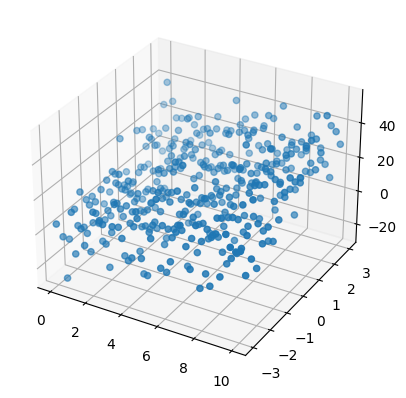

In [3]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x[:, 0], x[:, 1], y)
plt.show()

In [4]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(x, y)

print(model.coef_)
print(model.intercept_)

[2.07471788 2.96947281]
4.383935927577175


# Linear regression - RANSAC

In [5]:
import pandas as pd

X = np.random.uniform(0, 100, 100)
x1 = np.random.choice([0, 1], 100, p=[0.8, 0.2])
y = 2*X - 3*x1*X + 5 + np.random.randn(100)

df = pd.DataFrame({"x":X, "x1":x1, "y":y})

df.head(10)

,x,x1,y
0,61.016882,0,127.487072
1,51.032665,1,-45.782793
2,20.596472,0,45.159386
3,29.365767,1,-25.229053
4,82.130308,0,169.172484
5,27.850976,0,59.699067
6,36.607598,0,76.393117
7,66.432992,0,135.709276
8,62.337077,0,129.445099
9,80.893525,0,166.196607


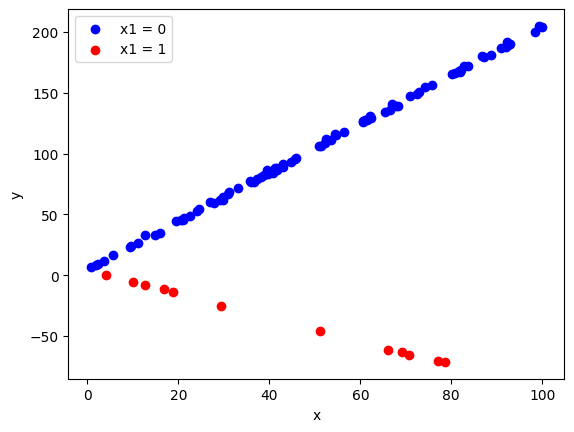

In [6]:
plt.scatter(df[df['x1'] == 0]['x'], df[df['x1'] == 0]['y'], color='blue', label='x1 = 0')
plt.scatter(df[df['x1'] == 1]['x'], df[df['x1'] == 1]['y'], color='red', label='x1 = 1')

# Add labels and legend
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

# Show the plot
plt.show()

In [7]:
from sklearn.linear_model import RANSACRegressor

X = np.array(df['x']).reshape(-1, 1)
y = np.array(df['y']).reshape(-1, 1)

ransac = RANSACRegressor(LinearRegression(),
                         max_trials=100,
                         min_samples=0.90,
                         residual_threshold=None,
                         random_state=123)

ransac.fit(X, y)

RANSACRegressor(estimator=LinearRegression(), min_samples=0.9, random_state=123)

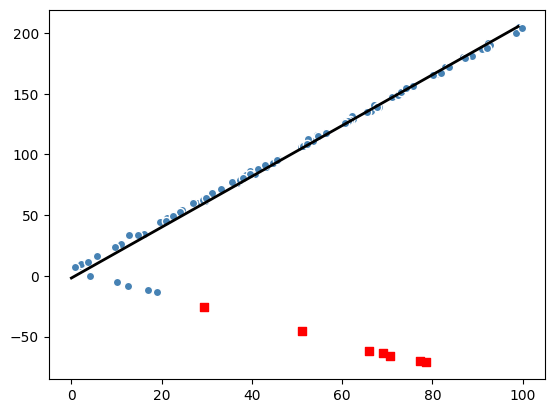

In [8]:
inlier_mask = ransac.inlier_mask_
outlier_mask = np.logical_not(inlier_mask)

line_X = np.arange(0, 100, 1)
line_y_ransac = ransac.predict(line_X[:, np.newaxis])

plt.scatter(X[inlier_mask], y[inlier_mask],
            c='steelblue', edgecolor='white',
            marker='o', label='Inliers')

plt.scatter(X[outlier_mask], y[outlier_mask],
            c='red', edgecolor='red',
            marker='s', label='Outliers')
plt.plot(line_X, line_y_ransac, color='black', lw=2)
plt.show()

# Logistic regression in scikit-learn

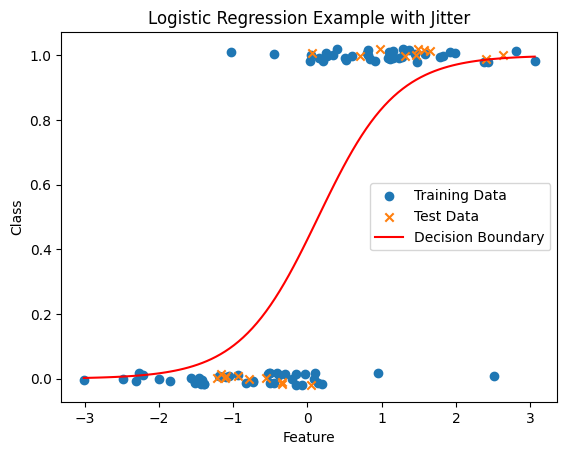

In [9]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification

# Generate synthetic data
random_seed = 16
X, y = make_classification(n_samples=100,
                           n_features=1,
                           n_informative=1,
                           n_redundant=0,
                           n_clusters_per_class=1,
                           random_state=random_seed)

# Add jitter to y-coordinates for visualization
jitter = 0.02
jitter_array = np.random.uniform(-jitter, jitter, size=y.shape)
y = y.astype(float) + jitter_array

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a logistic regression model
model = LogisticRegression()

# Fit the model on the training data
model.fit(X_train, np.round(y_train).astype(int))

# Generate data points for the decision boundary
x_range = np.linspace(X.min(), X.max(), 100)
y_pred = model.predict_proba(x_range.reshape(-1, 1))[:, 1]

# Plot the data points and the decision boundary
plt.scatter(X_train, y_train, label='Training Data', marker='o')
plt.scatter(X_test, y_test, label='Test Data', marker='x')
plt.plot(x_range, y_pred, color='red', label='Decision Boundary')
plt.xlabel('Feature')
plt.ylabel('Class')
plt.title('Logistic Regression Example with Jitter')
plt.legend()
plt.show()

In [10]:
model.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [11]:
model.coef_, model.intercept_

(array([[1.8995887]]), array([-0.27880469]))

Now, let's try it on Iris data set. Logistic function can be applied to multiple classes

In [12]:
from sklearn import datasets
import numpy as np

iris = datasets.load_iris()
X = iris.data[:, [2, 3]]
y = iris.target
print('Class labels:', np.unique(y))

Class labels: [0 1 2]


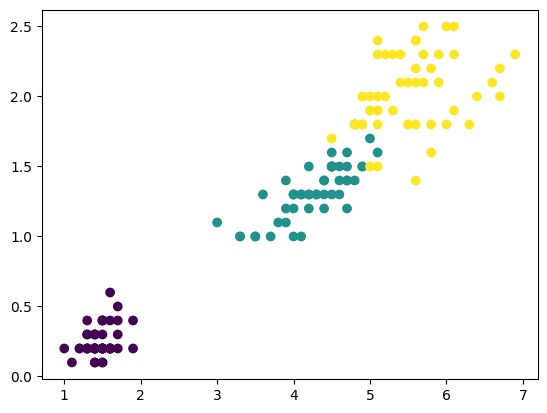

In [13]:
plt.scatter(X[:,0], X[:,1], c = y)

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

In [15]:
print('Labels counts in y:', np.bincount(y))
print('Labels counts in y_train:', np.bincount(y_train))
print('Labels counts in y_test:', np.bincount(y_test))

Labels counts in y: [50 50 50]
Labels counts in y_train: [35 35 35]
Labels counts in y_test: [15 15 15]


In [16]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [17]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

def plot_decision_regions(X, y, classifier, test_idx=None,
                          resolution=0.02):
    # setup marker generator and color map
    markers = ('o', 's', '^', 'v', '<')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    lab = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    lab = lab.reshape(xx1.shape)
    plt.contourf(xx1, xx2, lab, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    # plot class examples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0],
                    y=X[y == cl, 1],
                    alpha=0.8,
                    c=colors[idx],
                    marker=markers[idx],
                    label=f'Class {cl}',
                    edgecolor='black')
    # highlight test examples
    if test_idx:
        # plot all examples
        X_test, y_test = X[test_idx, :], y[test_idx]

        plt.scatter(X_test[:, 0], X_test[:, 1],
                    c='none', edgecolor='black', alpha=1.0,
                    linewidth=1, marker='o',
                    s=100, label='Test set')

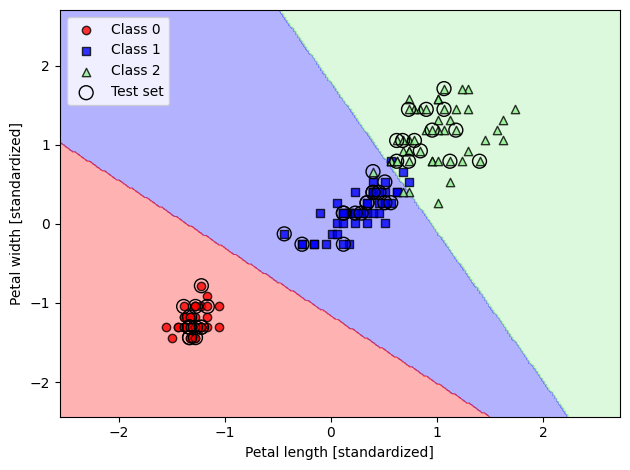

In [18]:
from sklearn.linear_model import LogisticRegression

X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

lr = LogisticRegression(C=100, solver='lbfgs',multi_class='multinomial') #'multinomial' 'ovr'
lr.fit(X_train_std, y_train)
plot_decision_regions(X_combined_std, y_combined, classifier=lr, test_idx=range(105, 150))
plt.xlabel('Petal length [standardized]')
plt.ylabel('Petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

Let's predict class membership probabilities for first 5 flowers:

In [19]:
lr.predict_proba(X_test_std[:5, :])

array([[1.52213484e-12, 3.85303417e-04, 9.99614697e-01],
       [9.93560717e-01, 6.43928295e-03, 1.14112016e-15],
       [9.98655228e-01, 1.34477208e-03, 1.76178271e-17],
       [3.79431985e-06, 9.04401285e-01, 9.55949212e-02],
       [5.22212406e-05, 9.94209099e-01, 5.73867966e-03]])

And identify the classes as argmax

In [20]:
lr.predict_proba(X_test_std[:5, :]).argmax(axis=1)

array([2, 0, 0, 1, 1])

- We can get the same answer if we use predict() method
- Note that we have to use .reshape(1,-1) to get correct dimensionality

In [21]:
lr.predict(X_test_std[0, :].reshape(1, -1))

array([2])

Note that parameter C defines the regularization in logistic regression (inverse weight coefficient).
- Experiment with different C values for code above!
- Below we show weight coefficient vs. C

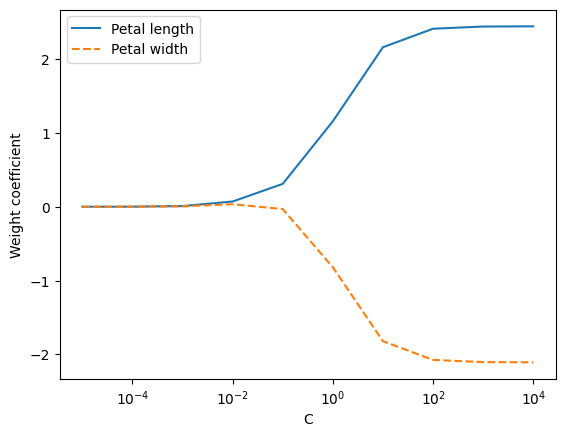

In [22]:
weights, params = [], []
for c in np.arange(-5, 5):
  lr = LogisticRegression(C=10.**c, multi_class='ovr')
  lr.fit(X_train_std, y_train)
  weights.append(lr.coef_[1])
  params.append(10.**c)
weights = np.array(weights)

plt.plot(params, weights[:, 0], label='Petal length')
plt.plot(params, weights[:, 1], linestyle='--', label='Petal width')
plt.ylabel('Weight coefficient')
plt.xlabel('C')
plt.legend(loc='upper left')
plt.xscale('log')
plt.show()

# Optional: DYI Logistic regression

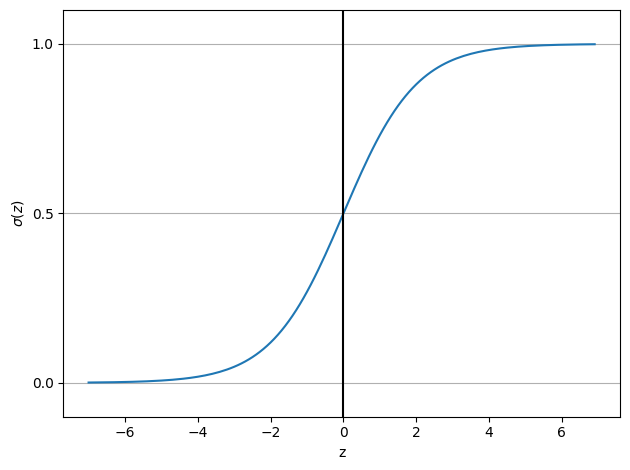

In [23]:
import matplotlib.pyplot as plt
import numpy as np

def sigmoid(z):
  return 1.0 / (1.0 + np.exp(-z))

z = np.arange(-7, 7, 0.1)
sigma_z = sigmoid(z)

plt.plot(z, sigma_z)
plt.axvline(0.0, color='k')
plt.ylim(-0.1, 1.1)
plt.xlabel('z')
plt.ylabel('$\sigma (z)$')

# y axis ticks and gridline
plt.yticks([0.0, 0.5, 1.0])
ax = plt.gca()
ax.yaxis.grid(True)
plt.tight_layout()
plt.show()

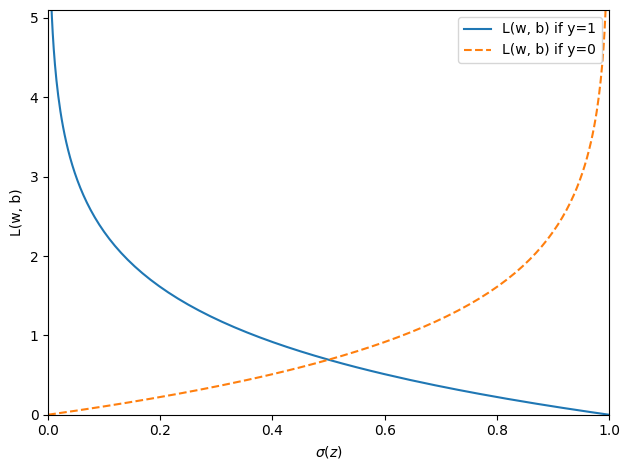

In [24]:
def loss_1(z):
  return - np.log(sigmoid(z))

def loss_0(z):
  return - np.log(1 - sigmoid(z))

z = np.arange(-10, 10, 0.1)
sigma_z = sigmoid(z)
c1 = [loss_1(x) for x in z]
plt.plot(sigma_z, c1, label='L(w, b) if y=1')
c0 = [loss_0(x) for x in z]
plt.plot(sigma_z, c0, linestyle='--', label='L(w, b) if y=0')
plt.ylim(0.0, 5.1)
plt.xlim([0, 1])
plt.xlabel('$\sigma(z)$')
plt.ylabel('L(w, b)')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [25]:
class LogisticRegressionGD:
    """Gradient descent-based logistic regression classifier.
    Parameters
    ------------
    eta : float
      Learning rate (between 0.0 and 1.0)
    n_iter : int
      Passes over the training dataset.
    random_state : int
      Random number generator seed for random weight
      initialization.
    Attributes
    -----------
    w_ : 1d-array
      Weights after training.
    b_ : Scalar
      Bias unit after fitting.
    losses_ : list
      Mean squared error loss function values in each epoch.
    """
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state
    def fit(self, X, y):
        """ Fit training data.
        Parameters
        ----------
        X : {array-like}, shape = [n_examples, n_features]
          Training vectors, where n_examples is the
          number of examples and n_features is the
          number of features.
        y : array-like, shape = [n_examples]
          Target values.
        Returns
        -------
        self : Instance of LogisticRegressionGD
        """
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=X.shape[1])
        self.b_ = np.float_(0.)
        self.losses_ = []
        for i in range(self.n_iter):
            net_input = self.net_input(X)
            output = self.activation(net_input)
            errors = (y - output)
            self.w_ += self.eta * 2.0 * X.T.dot(errors) / X.shape[0]
            self.b_ += self.eta * 2.0 * errors.mean()
            loss = (-y.dot(np.log(output))
                   - ((1 - y).dot(np.log(1 - output)))
                    / X.shape[0])
            self.losses_.append(loss)
        return self
    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_) + self.b_
    def activation(self, z):
        """Compute logistic sigmoid activation"""
        return 1. / (1. + np.exp(-np.clip(z, -250, 250)))
    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.activation(self.net_input(X)) >= 0.5, 1, 0)


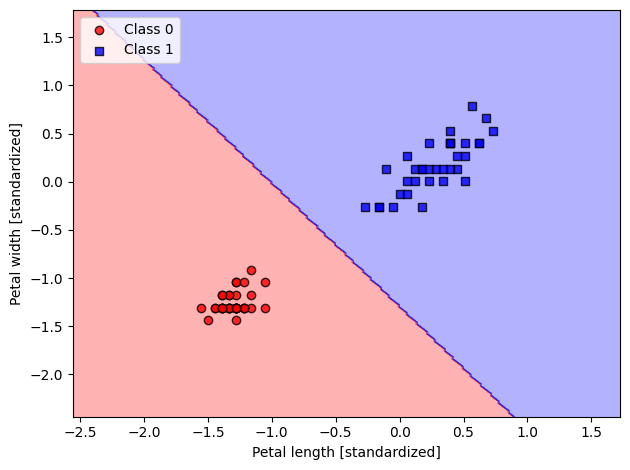

In [26]:
X_train_01_subset = X_train_std[(y_train == 0) | (y_train == 1)]
y_train_01_subset = y_train[(y_train == 0) | (y_train == 1)]

lrgd = LogisticRegressionGD(eta=0.3, n_iter=1000, random_state=1)
lrgd.fit(X_train_01_subset, y_train_01_subset)

plot_decision_regions(X=X_train_01_subset, y=y_train_01_subset, classifier=lrgd)
plt.xlabel('Petal length [standardized]')
plt.ylabel('Petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()